In [1]:
import time
import os
from datetime import datetime

import pandas as pd
import numpy as np

import finnhub


In [2]:
api_key = os.environ['FINNHUB_KEY']

In [3]:
finnhub_client = finnhub.Client(api_key=api_key)

# Script for harvesting data from finnhub

In [3]:
# major currency pairs
currencies = [
    'OANDA:GBP_CHF',
    'OANDA:AUD_CAD',
    'OANDA:EUR_NZD',
    'OANDA:GBP_CAD',
    'OANDA:GBP_AUD',
    'OANDA:NZD_JPY',
    'OANDA:AUD_NZD',
    'OANDA:EUR_CHF',
    'OANDA:EUR_AUD',
    'OANDA:AUD_JPY',
    'OANDA:EUR_GBP',
    'OANDA:GBP_JPY',
    'OANDA:EUR_JPY',
    'OANDA:NZD_USD',
    'OANDA:USD_CHF',
    'OANDA:USD_CAD',
    'OANDA:AUD_USD',
    'OANDA:GBP_USD',
    'OANDA:USD_JPY',
    'OANDA:EUR_USD'
]

In [ ]:
# start = 1664592159 # just for testing
start = 1104537600 # jan 1 2005

for currency in currencies:
    end = int(datetime.timestamp(datetime.now()))
    data = None

    while end > start:
        time.sleep(.4) # to stay away from the rate limit of 150 calls per min
        
        try:
            response = finnhub_client.forex_candles(currency, '1', start, end)
        except:
            time.sleep(90)
            finnhub_client = finnhub.Client(api_key=api_key)
            continue
        
        if response['c'] is None:
            end = end - 28800 # 8 hours
            continue

        fx = pd.DataFrame(response)
        fx = fx.rename(columns = {'o': 'open', 'h': 'high', 'l': 'low', 'c': 'close', 'v': 'volume'})
        fx['datetime'] = pd.to_datetime(fx['t'], unit='s')
        fx = fx.set_index('datetime')
        fx = fx.drop(columns = ['s', 't'])

        data = pd.concat((fx, data))

        end = response['t'][0]
        print(currency, end, end = '\r')
    
    data.to_csv(f"data/OANDA/{currency[-7:]}.csv")
    del data

# Appendix
Just looking at finnhub data and see how it corresponds with broker (coinexx) data

<AxesSubplot:xlabel='datetime'>

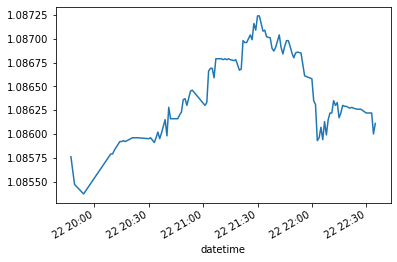

In [3]:
response = pd.DataFrame(finnhub_client.forex_candles('FXCM:EUR/USD', '1', int(datetime.timestamp(datetime.utcnow())) - 2000*60, int(datetime.timestamp(datetime.utcnow()))))

fx = pd.DataFrame(response).rename(columns = {'o': 'open', 'h': 'high', 'l': 'low', 'c': 'close'})
fx['datetime'] = pd.to_datetime(fx['t'], unit='s')
fx = fx.set_index('datetime')
fx['close'][-500:].plot()

<AxesSubplot:xlabel='datetime'>

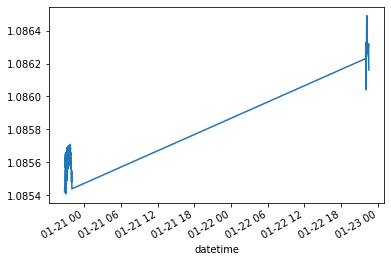

In [5]:
response = pd.DataFrame(finnhub_client.forex_candles('OANDA:EUR_USD', '1', 1230768000, int(datetime.timestamp(datetime.now()))))

fx = pd.DataFrame(response).rename(columns = {'o': 'open', 'h': 'high', 'l': 'low', 'c': 'close'})
fx['datetime'] = pd.to_datetime(fx['t'], unit='s')
fx = fx.set_index('datetime')
fx['close'][-500:].plot()

In [6]:
fx.between_time('20:59', '21:15')

,close,high,low,open,s,t,v
datetime,,,,,,,
2023-01-20 20:59:00,1.08558,1.08562,1.08548,1.08553,ok,1674248340,169
2023-01-20 21:00:00,1.08545,1.08559,1.08539,1.08559,ok,1674248400,96
2023-01-20 21:01:00,1.08541,1.08545,1.08539,1.08544,ok,1674248460,53
2023-01-20 21:02:00,1.08550,1.08553,1.08543,1.08543,ok,1674248520,39
2023-01-20 21:03:00,1.08549,1.08553,1.08547,1.08548,ok,1674248580,21
2023-01-20 21:04:00,1.08551,1.08551,1.08549,1.08550,ok,1674248640,4
2023-01-20 21:05:00,1.08559,1.08561,1.08557,1.08557,ok,1674248700,18
2023-01-20 21:06:00,1.08561,1.08562,1.08558,1.08558,ok,1674248760,8
2023-01-20 21:07:00,1.08566,1.08566,1.08560,1.08561,ok,1674248820,5
